In [4]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.animation import FuncAnimation
import math
from math import sin, cos, radians
import time
from random import randint as rand

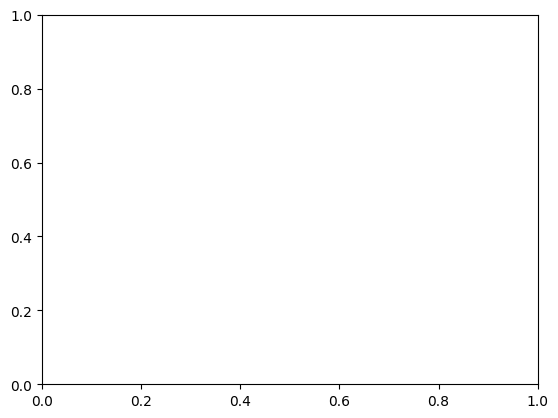

In [5]:
dt=0.01
num_frames=5
fig,ax=plt.subplots()

In [6]:
class point:
    def __init__(self,x,y):
        self.x=x 
        self.y=y 
    def __add__(self, p):
        return point(self.x+p.x,self.y+p.y)
    def __sub__(self, p):
        return point(self.x-p.x,self.y-p.y)
    def __mul__(self,s):
        return point(self.x*s,self.y*s)
    def print(self):
        print("(",self.x,",",self.y,")")

In [7]:
#utility functions
def GetOrthUnitVector(V):#V is a point
    if V.y==0:
        return point(0,1)
    v1=5
    v2=(-(V.x)/V.y)*v1
    magnitude=math.sqrt(v1**2+v2**2)
    v2=v2/magnitude
    v1=v1/magnitude
    return point(v1,v2)

def PrintPoints(points):
    for x in points:
        x.print()

def DrawRectangle(p):
    x, y = [p[i].x for i in range(4)], [p[i].y for i in range(4)]
    x.append(p[0].x)
    y.append(p[0].y)
    ln,=ax.plot(x,y)

In [8]:
class vehicle:
    def __init__(self, length, width, speed_limit, acc_limit, centroid, angle, v, a):
        #parameters
        self.length = length
        self.width = width
        self.speed_limit = speed_limit 
        self.acc_limit = acc_limit 
        #state variables
        self.centroid = centroid 
        self.angle = angle 
        self.v = v
        self.a = a
    def StateToCorners(self):#takes vehicle object as input
        dir_vect=point(math.cos(self.angle),math.sin(self.angle))
        dir_vect=dir_vect*(self.length/2)
        orth_vect=GetOrthUnitVector(dir_vect)
        orth_vect=point(orth_vect.x*(self.width)/2,orth_vect.y*(self.width)/2)
        points=[]
        points.append(self.centroid+dir_vect+orth_vect)
        points.append(self.centroid+dir_vect-orth_vect)
        points.append(self.centroid-dir_vect-orth_vect)
        points.append(self.centroid-dir_vect+orth_vect)
        #PrintPoints(points)
        return points
    def DrawVehicle(self):
        p=self.StateToCorners()
        DrawRectangle(p)
        
        plt.plot(self.centroid.x,self.centroid.y,marker="o",markersize=5,markerfacecolor="green")
        ax = plt.gca()
        ax.set_aspect('equal', adjustable='box')
        #plt.draw()
    def ShortestDistance(self,V):
        veh1=self.StateToCorners()
        veh2=V.StateToCorners()
        min=99999999
        for i in veh1:
            for j in veh2:
                dist = math.dist([i.x, i.y], [j.x, j.y])
                if dist<min:
                    min=dist
        return min
    def controller(self):
        return self.a#will return acceleration at t+1 using acceleration at t
    def updateStateVars(self):
            self.v=self.v+(self.controller()*dt)
            self.centroid=self.centroid+self.v*dt
    
    def simulate(self):
        x=[]
        y=[]
        for i in range(num_frames):
            x.append(rand(0,100))
            y.append(rand(0,100))
            plt.xlim(0,100)
            plt.ylim(0,100)
            plt.scatter(x,y)
            plt.pause(0.01)
        plt.show()                        

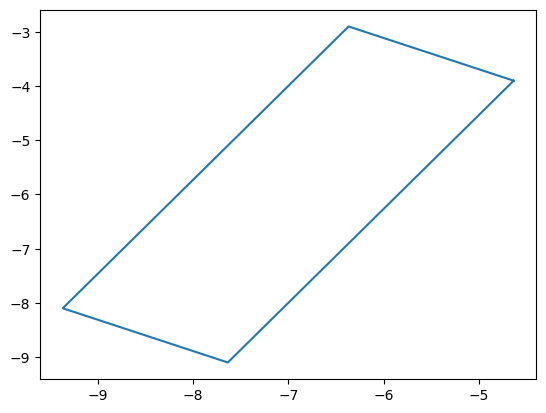

In [9]:
l=6
w=2
vehicle_angle=radians(60)
vel_angle=radians(30)
vel_dir=point(cos(vel_angle),sin(vel_angle))
centroid=point(-7,-6)
curr_speed=5
curr_vel=vel_dir*curr_speed
curr_vel+=centroid
V=vehicle(l,w,0,0,centroid,vehicle_angle,curr_vel,point(0,0))

fig, ax = plt.subplots()
p=V.StateToCorners()
x, y = [p[i].x for i in range(4)], [p[i].y for i in range(4)]
x.append(p[0].x)
y.append(p[0].y)
ln,=ax.plot(x,y)

def artists():
    return ln
def animate(frame):
    #V.updateStateVars()
    #p=V.StateToCorners()
    # x, y = [p[i].x for i in range(4)], [p[i].y for i in range(4)]
    # x.append(p[0].x)
    # y.append(p[0].y)
    x.append(rand(0,100))
    y.append(rand(0,100))
    ln.set_data(x,y)
    fig.gca().relim
    fig.gca().autoscale_view()
animation=FuncAnimation(fig,animate,interval=300,init_func=artists)  
plt.show()

In [10]:

# def main():
#     l=6
#     w=2
#     vehicle_angle=radians(60)
#     vel_angle=radians(30)
#     vel_dir=point(cos(vel_angle),sin(vel_angle))
#     centroid=point(-7,-6)
#     curr_speed=5
#     curr_vel=vel_dir*curr_speed
#     curr_vel+=centroid
#     V=vehicle(l,w,0,0,centroid,vehicle_angle,curr_vel,point(0,0))

#     fig, ax = plt.subplots()
#     p=V.StateToCorners()
#     l1,l2,l3,l4,=DrawRectangle(p)
    
#     #V.simulate()
#     # l=6
#     # w=4
#     # angle=math.radians(205)
#     # centroid=point(8,6)
#     # V1=vehicle(l,w,0,0,centroid,angle)
    
#     # print(V.ShortestDistance(V1))

# if __name__ == "__main__":
#     main()

In [12]:
# x=[1,2,3,4]
# y=[6,9,4,7]
# fig,ax=plt.subplots()
# ln,=ax.plot(x,y)

# def artists():
#     return ln
# def animate(frame):
#     print(frame)
#     # x.append(rand(0,100))
#     # y.append(rand(0,100))
#     # ln.set_data(x,y)
#     # fig.gca().relim
#     # fig.gca().autoscale_view()
# anim=FuncAnimation(fig,animate,interval=300)  
# anim.save('continuousSineWave.mp4',
# 		writer = 'ffmpeg', fps = 30)
# plt.show()

C:\Users\aimen\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\matplotlib\animation.py:879: UserWarning: Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you output the Animation using `plt.show()` or `anim.save()`.
  warnings.warn(


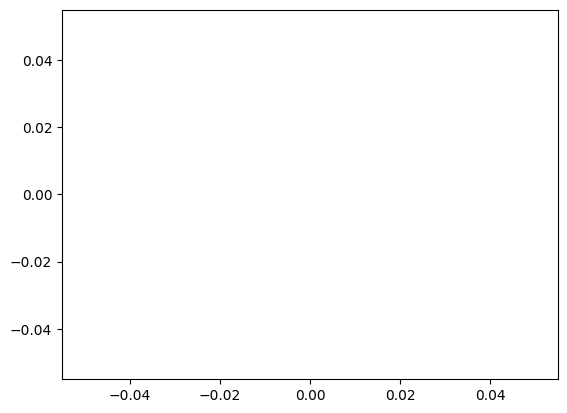

In [13]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from random import randint as rand
# Create a figure and a subplot
fig, ax = plt.subplots()

# Initialize some data
x = [0]
y = [0]

# Create a line object to be updated in the animation
line, = ax.plot(x, y)

# Define the update function for the animation
def update(num):
    # Update the x and y data
    x.append(rand(0,100))
    y.append(rand(0,100))
    # Update the line object with the new data
    line.set_data(x, y)
    # Return the line object so that it can be updated in the animation
    return line,

# Create the animation object
anim = animation.FuncAnimation(fig, update, interval=200)

# Show the animation
plt.show()


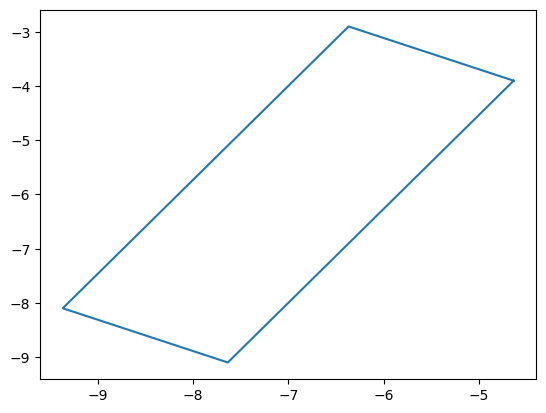

In [14]:
l=6
w=2
vehicle_angle=radians(60)
vel_angle=radians(30)
vel_dir=point(cos(vel_angle),sin(vel_angle))
centroid=point(-7,-6)
curr_speed=5
curr_vel=vel_dir*curr_speed
curr_vel+=centroid
V=vehicle(l,w,0,0,centroid,vehicle_angle,curr_vel,point(0,0))

fig, ax = plt.subplots()
p=V.StateToCorners()
x, y = [p[i].x for i in range(4)], [p[i].y for i in range(4)]
x.append(p[0].x)
y.append(p[0].y)
ln,=ax.plot(x,y)

def artists():
    return ln
def animate(frame):
    #V.updateStateVars()
    #p=V.StateToCorners()
    # x, y = [p[i].x for i in range(4)], [p[i].y for i in range(4)]
    # x.append(p[0].x)
    # y.append(p[0].y)
    x.append(rand(0,100))
    y.append(rand(0,100))
    ln.set_data(x,y)
    fig.gca().relim
    fig.gca().autoscale_view()
animation=FuncAnimation(fig,animate,interval=300,init_func=artists)  
plt.show()

MovieWriter ffmpeg unavailable; using Pillow instead.


ValueError: unknown file extension: .mp4

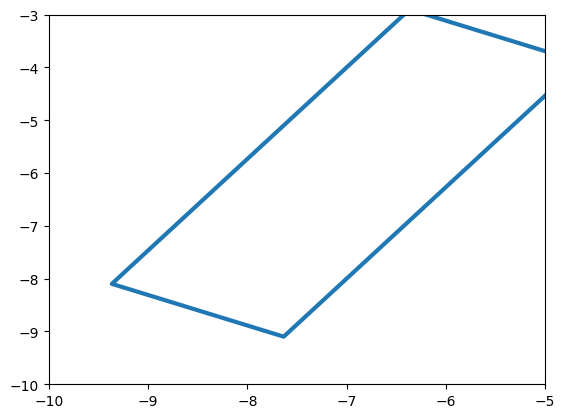

In [15]:
from matplotlib import pyplot as plt
import numpy as np
from matplotlib.animation import FuncAnimation
from math import radians, sin, cos
# initializing a figure in
# which the graph will be plotted
fig = plt.figure()
l=6
w=2
vehicle_angle=radians(60)
vel_angle=radians(30)
vel_dir=point(cos(vel_angle),sin(vel_angle))
centroid=point(-7,-6)
curr_speed=5
curr_vel=vel_dir*curr_speed
curr_vel+=centroid
V=vehicle(l,w,0,0,centroid,vehicle_angle,curr_vel,point(0,0))
x, y = [p[i].x for i in range(4)], [p[i].y for i in range(4)]
x.append(p[0].x)
y.append(p[0].y)
# marking the x-axis and y-axis
axis = plt.axes(xlim =(-10, -5),
				ylim =(-10, -3))

# initializing a line variable
line, = axis.plot(x, y, lw = 3)

# data which the line will
# contain (x, y)
def init():
	line.set_data(x,y)
	return line,

def animate(i):
	V.updateStateVars()
	x, y = [p[i].x for i in range(4)], [p[i].y for i in range(4)]
	x.append(p[0].x)
	y.append(p[0].y)
	
	line.set_data(x, y)	
	return line,

anim = FuncAnimation(fig, animate, init_func = init,
					frames = 200, interval = 20, blit = True)


anim.save('continuousSineWave.mp4',
		writer = 'ffmpeg', fps = 30)

MovieWriter ffmpeg unavailable; using Pillow instead.


ValueError: unknown file extension: .mp4

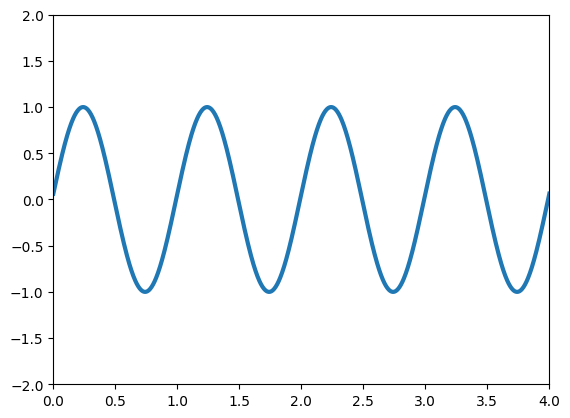

In [1]:
from matplotlib import pyplot as plt
import numpy as np
from matplotlib.animation import FuncAnimation
import ffmpeg
# initializing a figure in
# which the graph will be plotted
fig = plt.figure()

# marking the x-axis and y-axis
axis = plt.axes(xlim =(0, 4),
				ylim =(-2, 2))

# initializing a line variable
line, = axis.plot([], [], lw = 3)

# data which the line will
# contain (x, y)
def init():
	line.set_data([], [])
	return line,

def animate(i):
	x = np.linspace(0, 4, 1000)

	# plots a sine graph
	y = np.sin(2 * np.pi * (x - 0.01 * i))
	line.set_data(x, y)
	
	return line,

anim = FuncAnimation(fig, animate, init_func = init,
					frames = 200, interval = 20, blit = True)


anim.save('continuousSineWave.mp4',
		writer = 'ffmpeg', fps = 30)